In [162]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from skimage.io import imread, imshow
%matplotlib inline
import scipy.linalg as sla
from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# import re
# from nltk.stem.snowball import SnowballStemmer
# import pandas as pd

In [7]:
K=3
centroids = np.array([[3,3],[6,2],[8,5]])

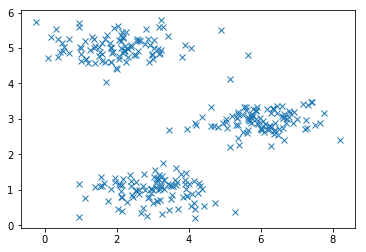

In [48]:
data = loadmat('ex7data2', mat_dtype=True)

X = data['X']

plt.plot(X[:,0], X[:,1], linestyle='', marker='x')
plt.show()
# y = data['y'][:,0]

# plt.plot(X[:,0][y==1], X[:,1][y==1], linestyle='', marker='+', color='black')
# plt.plot(X[:,0][y==0], X[:,1][y==0], linestyle='', marker='o', color='y')

# plt.show()

In [61]:
def calcDistance(x,y):
    delta = x-y
    return np.sqrt(delta.dot(delta))

def findClosestCentroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0])
    i = 0
    for x in X:
        distance = calcDistance(x, centroids[0])
        for j in range(1,K,1):
            newDistance = calcDistance(x, centroids[j])
            if distance > newDistance:
                distance = newDistance
                idx[i] = j
        i += 1
    return idx

def computeCentroids(X,idx,K):
    centroids = np.empty((K,X.shape[1]))
    for mu in range(K):
        centroids[mu] = X[idx==mu].mean(axis=0)
    return centroids

def runKMeans(X,initial_centroids,max_iters):
    centroids = initial_centroids.copy()
    K = centroids.shape[0]
    dimensions = centroids.shape[1]
    centTrace = initial_centroids.copy().reshape(1,K,dimensions) #np.array([max_iters,K,centroids.shape[1]])
    for i in range(max_iters):
        idx = findClosestCentroids(X,centroids)
        centroids = computeCentroids(X,idx,K)
        centTrace = np.append(centTrace, centroids.reshape(1,K,dimensions),axis=0)
    return centroids, idx, centTrace

In [24]:
idx = findClosestCentroids(X, centroids)
idx[:3]

array([ 0.,  2.,  1.])

In [33]:
computeCentroids(X, idx, K)

array([[ 2.42830111,  3.15792418],
       [ 5.81350331,  2.63365645],
       [ 7.11938687,  3.6166844 ]])

In [62]:
Kcent, idx, trace = runKMeans(X,centroids,10)

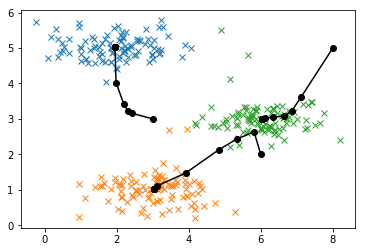

In [69]:
plt.plot(X[idx==0][:,0], X[idx==0][:,1], linestyle='', marker='x')
plt.plot(X[idx==1][:,0], X[idx==1][:,1], linestyle='', marker='x')
plt.plot(X[idx==2][:,0], X[idx==2][:,1], linestyle='', marker='x')
plt.plot(trace[:,0,0], trace[:,0,1], marker='o', color='black')
plt.plot(trace[:,1,0], trace[:,1,1], marker='o', color='black')
plt.plot(trace[:,2,0], trace[:,2,1], marker='o', color='black')
plt.show()

In [107]:
initialCentroids = X[np.random.choice(range(X.shape[0]),K)]
Kcent, idx, trace = runKMeans(X,initialCentroids,10)

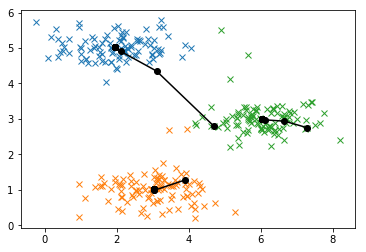

In [108]:
plt.plot(X[idx==0][:,0], X[idx==0][:,1], linestyle='', marker='x')
plt.plot(X[idx==1][:,0], X[idx==1][:,1], linestyle='', marker='x')
plt.plot(X[idx==2][:,0], X[idx==2][:,1], linestyle='', marker='x')
plt.plot(trace[:,0,0], trace[:,0,1], marker='o', color='black')
plt.plot(trace[:,1,0], trace[:,1,1], marker='o', color='black')
plt.plot(trace[:,2,0], trace[:,2,1], marker='o', color='black')
plt.show()

In [95]:
Kcent

array([[ 3.04367119,  1.01541041],
       [ 1.95399466,  5.02557006],
       [ 6.03366736,  3.00052511]])

Image compression

In [134]:
img = imread('bird_small.png')

In [135]:
X_img = img.reshape(img.shape[0]*img.shape[1], 3).copy()

In [140]:
K=16
initialCentroids = X_img[np.random.choice(range(X_img.shape[0]),K)]
Kcent, idx, trace = runKMeans(X_img,initialCentroids,20)

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice.
/opt/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [141]:
for i in range(K):
    X_img[idx==i] = Kcent[i]

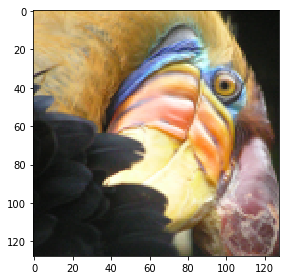

In [142]:
imshow(img)

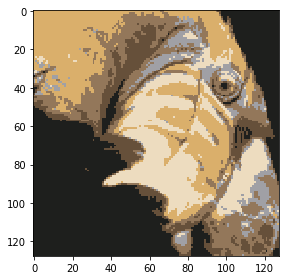

In [143]:
imshow(X_img.reshape([128,128,3]))

PCA

In [204]:
data = loadmat('ex7data1', mat_dtype=True)

X = data['X']
m = X.shape[0]

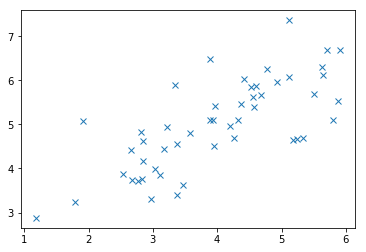

In [205]:
plt.plot(X[:,0], X[:,1], linestyle='', marker='x')
plt.show()

In [206]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

mu = scaler.mean_

In [237]:
sgma = X_sc.T.dot(X_sc)/(m)

In [238]:
sgma

array([[ 1.        ,  0.73553038],
       [ 0.73553038,  1.        ]])

In [239]:
np.cov(X_sc.T)

array([[ 1.02040816,  0.7505412 ],
       [ 0.7505412 ,  1.02040816]])

In [240]:
U,S,V = sla.svd(sgma)

In [241]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [242]:
S

array([ 1.73553038,  0.26446962])

In [243]:
V

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [244]:
U[:,1].reshape(1,2)

array([[-0.70710678,  0.70710678]])

In [245]:
mu

array([ 3.98926528,  5.00280585])

In [246]:
mu+U[:,0]

array([ 3.2821585 ,  4.29569907])

In [247]:
mu+U[:,1]

array([ 3.2821585 ,  5.70991263])

In [268]:
illust = np.insert(mu.reshape(1,2),1,(mu+S[0]*U[:,0]).reshape(1,2),axis=0)

In [269]:
illust2 = np.insert(mu.reshape(1,2),1,(mu+S[1]*U[:,1]).reshape(1,2),axis=0)

In [250]:
illust

array([[ 3.98926528,  5.00280585],
       [ 3.2821585 ,  4.29569907]])

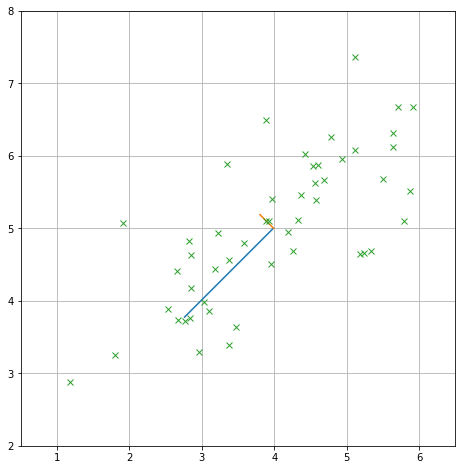

In [272]:
plt.figure(figsize=[10,8])
plt.plot(illust[:,0], illust[:,1])
plt.plot(illust2[:,0], illust2[:,1])
plt.plot(X[:,0], X[:,1], linestyle='', marker='x')
# plt.plot([0,U[0,0]], [0,U[1,0]])
# plt.plot([0,U[0,1]], [0,U[1,1]])
plt.grid()
plt.ylim(2,8)
plt.xlim(.5,6.5)
plt.axes().set_aspect('equal')
plt.show()